In [7]:
from __future__ import print_function
import pandas as pd
import numpy as np
import re
from tqdm import tqdm,trange
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
os.chdir('C:\\Users\\ASUS\\PycharmProjects\\RahnemaProject')

In [9]:
df = pd.read_csv('LogDataRepair.csv')

In [10]:
def get_null(row):
    if row =='-':
        return np.nan
    else:
        return row

df['ResponseTime'] = df['ResponseTime'].apply(lambda x:get_null(x))


In [11]:
df.isnull().sum()

line                  0
ClientIp          18090
DateTime              0
MethodPath            0
StatCode              0
ResponseLength        0
UserAgent             0
ResponseTime      19808
dtype: int64

In [12]:
df['DateTime'] = df['DateTime'].apply(lambda x:x[1:-1])

In [13]:
df['DateTime'] = pd.to_datetime(df['DateTime'],unit='ns')

In [14]:
df['Method'] = df['MethodPath'].apply(lambda x:x.split(' ')[0][1:])
df['Path'] = df['MethodPath'].apply(lambda x:x.split(' ')[1][0:-1])

In [15]:
df = df.drop('MethodPath',axis =1)
df = df.drop('line',axis =1)


In [16]:
df['UserAgent'] = df['UserAgent'].apply(lambda x:x[2:-2])


In [17]:
df.columns  = ['client_ip','date_time','status_code','response_length','user_agent','response_time','method','path']

In [18]:
df = df.sort_values('date_time')

In [19]:
df = df.reset_index()

In [20]:
df = df.drop('index',axis=1)
df.head()


,client_ip,date_time,status_code,response_length,user_agent,response_time,method,path
0,207.213.193.143,2021-05-12 05:06:00+04:30,304,0,Googlebot-Image/1.0,32,Get,/cdn/profiles/1026106239
1,20.92.247.170,2021-05-12 05:06:00+04:30,200,0,Go-http-client/2.0,24,Head,/877499224
2,207.213.193.143,2021-05-12 05:06:00+04:30,304,0,Googlebot-Image/1.0,16,Get,/cdn/pro_photo_gallery/1983423896
3,76.212.164.3,2021-05-12 05:06:00+04:30,200,0,Go-http-client/2.0,20,Head,/877499224
4,207.213.193.143,2021-05-12 05:06:00+04:30,304,0,Googlebot-Image/1.0,32,Get,/cdn/pro_photo_gallery/1766634074


In [28]:
df['response_time'] = df['response_time'].apply(lambda x:float(x) )
df['response_time'].dtype

dtype('float64')

In [25]:
df.describe()

,status_code,response_length
count,1.260035e+06,1.260035e+06
mean,2.313682e+02,4.580962e+04
std,5.804793e+01,3.350437e+05
min,1.010000e+02,0.000000e+00
25%,2.000000e+02,0.000000e+00
50%,2.000000e+02,1.201000e+03
75%,3.040000e+02,2.650500e+04
max,5.030000e+02,1.022335e+08


In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260035 entries, 0 to 1260034
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype                                
---  ------           --------------    -----                                
 0   client_ip        1241945 non-null  object                               
 1   date_time        1260035 non-null  datetime64[ns, pytz.FixedOffset(270)]
 2   status_code      1260035 non-null  int64                                
 3   response_length  1260035 non-null  int64                                
 4   user_agent       1260035 non-null  object                               
 5   response_time    1240227 non-null  float64                              
 6   method           1260035 non-null  object                               
 7   path             1260035 non-null  object                               
dtypes: datetime64[ns, pytz.FixedOffset(270)](1), float64(1), int64(2), object(4)
memory usage: 126.5+ MB


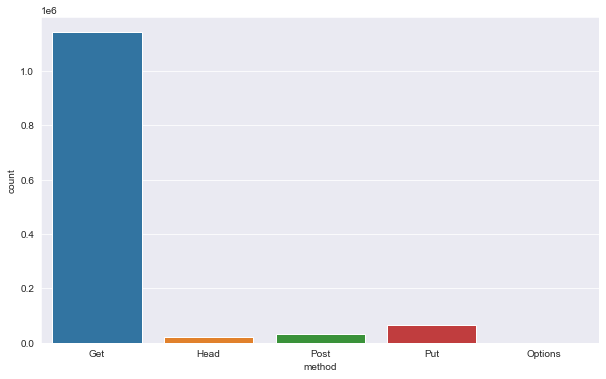

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.countplot(df['method'])

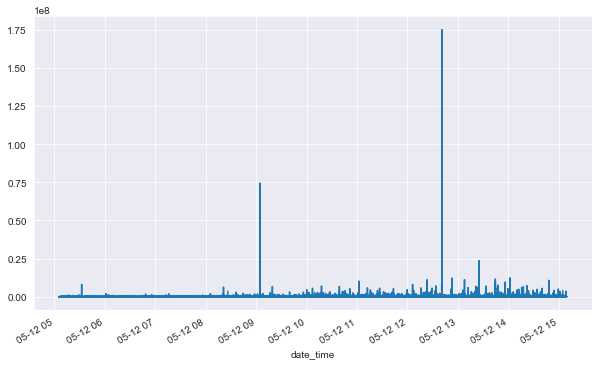

In [39]:
plt.figure(figsize=(10,6))
TS_df = df.set_index('date_time')
TS_df['response_time'].plot()

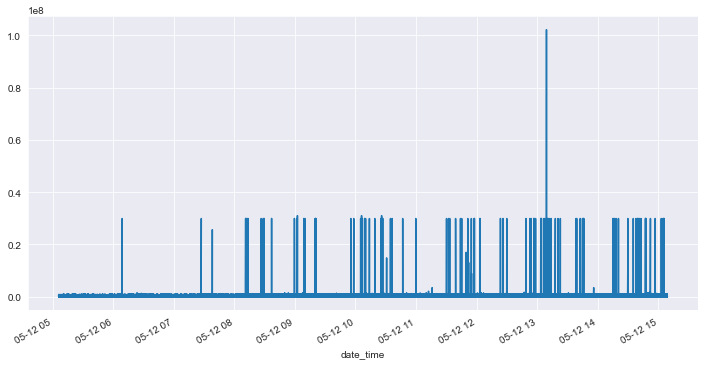

In [48]:
plt.figure(figsize=(12,6))
TS_df = df.set_index('date_time')
TS_df['response_length'].plot()

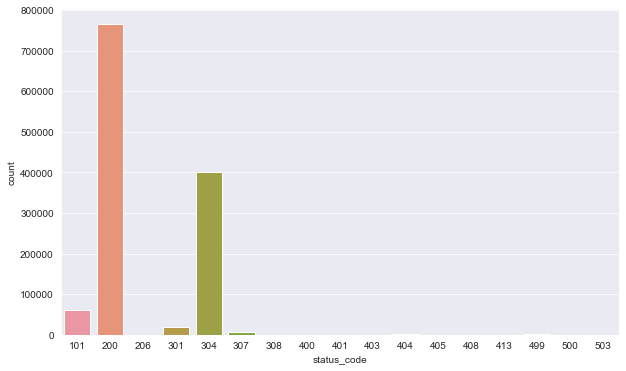

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(df['status_code'])

In [29]:
user_df = df.groupby(by=['client_ip','user_agent']).mean()['response_time']

In [30]:
pd.DataFrame(user_df)

response_time
client_ip     user_agent                                                       
1.56.57.214   Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Ma...      28.000000
1.66.71.34    Mozilla/5.0 (iPhone; CPU iPhone OS 14_4_2 like ...      28.000000
1.81.122.235  Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Ma...      41.714286
10.92.2.8     Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-A...      25.428571
100.92.35.41  Mozilla/5.0 (Linux; Android 9; SM-A205F) AppleW...      26.333333
...                                                                         ...
99.239.78.14  Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...       7.428571
              Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...       9.272727
              Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleW...       8.380952
99.239.97.147 Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:89...      24.601770
99.96.90.10   Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Ma...      28.000000

[51125 rows x 1 columns]

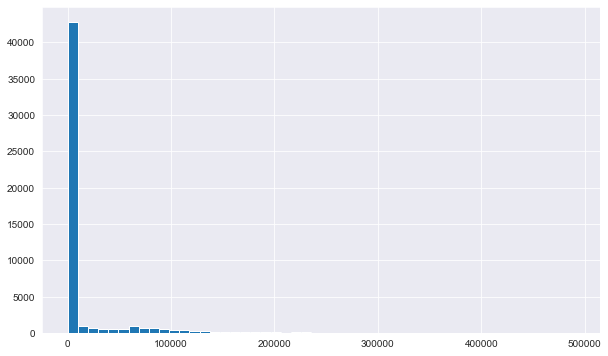

In [38]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
user_df[user_df<0.5*10**6].hist(bins=50)


In [84]:
df.to_csv('Processed_Data.csv')


geo location based on ip

last refer (time based)
last refer (page)

Pca with no processing
path analysis -> path tree

Handle Null Values
---

In [123]:
df = pd.read_csv('Processed_Data.csv')
df = df.drop('Unnamed: 0',axis=1)

In [23]:
server_ip = '300.300.300.300'
server_response_time = 0

In [24]:
df.loc[(df['user_agent']=='kube-probe/1.21')&(df['client_ip'].isnull()==True),'client_ip'] = server_ip

In [25]:
df.loc[(df['user_agent']=='kube-probe/1.21')&(df['response_time'].isnull()==True)&(df['client_ip']==server_ip),'response_time'] = server_response_time

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260035 entries, 0 to 1260034
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype                                
---  ------           --------------    -----                                
 0   client_ip        1260035 non-null  object                               
 1   date_time        1260035 non-null  datetime64[ns, pytz.FixedOffset(270)]
 2   status_code      1260035 non-null  int64                                
 3   response_length  1260035 non-null  int64                                
 4   user_agent       1260035 non-null  object                               
 5   response_time    1258317 non-null  object                               
 6   method           1260035 non-null  object                               
 7   path             1260035 non-null  object                               
dtypes: datetime64[ns, pytz.FixedOffset(270)](1), int64(2), object(5)
memory usage: 76.9+ MB


In [127]:
df.isnull().sum()


client_ip             0
date_time             0
status_code           0
response_length       0
user_agent            0
response_time      1718
method                0
path                  0
dtype: int64

In [128]:
df['client_ip'] = df['client_ip'].apply(lambda x:x if x[-1]!=' ' else x[:-1])

In [129]:
df.to_csv('pre_processing_v2.csv')

In [ ]:
df[df['response_time'].isnull()==True]
